<a href="https://colab.research.google.com/github/ruthika11/ipython-notebook-examples/blob/master/Airport_and_airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **PART I**

# > Questions

**1**.Top 20 highest altitude airports in the world. Choose only “type” with “airport”   
Output:
airport_id, name, city, country, altitude, rank

**2**.Top 20 countries that have the highest total # of airports.  
Output:
country, total_airports, rank

**3**.Top 20 cities that have the highest total # of airports. (Two cities from different countries can have the same name, and you have to make sure the numbers are not messed up due to that!)  
Output:
city, total_airports, rank  

**4**.Pair of cities that have the same name, but from two different countries.  
Output:
city_a, country_a, city_b, country_b



---

# **PART II**



# > Questions


**1**.In the year 2009, print Top 10 cities in the USA that received maximum # inbound flights.  
Output:
city,total_inbound_flights,rank

**2**.In the year 2009, print Top 10 cities in the USA that received maximum # outbound flights.
Output:
city,total_outbound_flights,rank

**3**.In between 1999-2009, print Top 10 cities in the USA that received maximum # outbound flights.   
Output:
city,total_outbound_flights, rank

**4**.In between 1999-2009, the Top 10 cities in the USA carry the maximum total # of passengers on outbound flights. The city column in the output will also have its state (For example San Fransico, CA).    
Output:
city,total_num_passengers,rank

**5**.In the years 2007 and 2009 together, the Top 10 states in the USA carry the maximum total # of passengers on the outbound flights.    
Output:
state,total_num_passengers,rank

**6**.Merge the columns 1 and 2    
Output:
city,total_inbound_flights,inbound_rank,total_outbound_flights,outbound_rank

**7**.Plot group bar chart with seaborn/matplotlib for the output in question 6 above specifically city,total_inbound_flights,total_outbound_flights. One bar for total_inbound_flights and another for total_outbound_flights. Plot for only top 10 cities by total_inbound_flights.

	X-axis - city
	Y-axis - total_outbound_flights, total_inbound_flights


In [ ]:
import csv
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive/")
from tabulate import tabulate
import seaborn as sns
import datetime
from dateutil import parser
import matplotlib.pyplot as plt

In [ ]:
!ls - ltr /content/drive/MyDrive/

In [4]:
df1 = pd.read_csv(r"/content/drive/MyDrive/airports.dat.txt")
df1.columns = ["Airport_Id","Name","City","Country","IATA","ICAD","Latitude","Longitude","Altitude","Timezone","DST","Tz database timezone","Type","Source"]
df2 = pd.read_csv(r"/content/drive/MyDrive/Airports2.csv")
print(df1.head(2))
print(df2.head(2))

   Airport_Id                          Name         City           Country  \
0           2                Madang Airport       Madang  Papua New Guinea   
1           3  Mount Hagen Kagamuga Airport  Mount Hagen  Papua New Guinea   

  IATA  ICAD  Latitude   Longitude  Altitude Timezone DST  \
0  MAG  AYMD  -5.20708  145.789001        20       10   U   
1  HGU  AYMH  -5.82679  144.296005      5388       10   U   

   Tz database timezone     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
  Origin_airport Destination_airport    Origin_city Destination_city  \
0            MHK                 AMW  Manhattan, KS         Ames, IA   
1            EUG                 RDM     Eugene, OR         Bend, OR   

   Passengers  Seats  Flights  Distance    Fly_date  Origin_population  \
0          21     30        1       254  2008-10-01             122049   
1          41    396       22       103  1990-11-01             284093  

In [5]:
def pretty_print(df,n):
    print(tabulate(df.head(n), headers="keys", tablefmt="psql"))
def get_year(row):
  return datetime.datetime.strptime(row["Fly_date"], "%Y-%m-%d").year

In [6]:
df2["year"] = df2.apply(get_year,axis = 1)

#**PART I**

**1**.Top 20 highest altitude airports in the world. Choose only “type” with “airport”   
Output: airport_id, name, city, country, altitude, rank

In [7]:
high_alt = df1.sort_values(by = "Altitude", ascending = False)
high_alt = high_alt[['Airport_Id',"Name","City","Country","Altitude"]]
high_alt["Rank"] = high_alt['Altitude'].rank(ascending = False)
pretty_print(high_alt,20)

+------+--------------+----------------------------------------+-------------+-----------+------------+--------+
|      |   Airport_Id | Name                                   | City        | Country   |   Altitude |   Rank |
|------+--------------+----------------------------------------+-------------+-----------+------------+--------|
| 6541 |         9310 | Daocheng Yading Airport                | Daocheng    | China     |      14472 |      1 |
| 5027 |         6396 | Qamdo Bangda Airport                   | Bangda      | China     |      14219 |      2 |
| 6392 |         8921 | Kangding Airport                       | Kangding    | China     |      14042 |      3 |
| 5871 |         7932 | Ngari Gunsa Airport                    | Shiquanhe   | China     |      14022 |      4 |
| 2624 |         2762 | El Alto International Airport          | La Paz      | Bolivia   |      13355 |      5 |
| 2626 |         2764 | Capitan Nicolas Rojas Airport          | Potosi      | Bolivia   |      

**2**.Top 20 countries that have the highest total # of airports.  
Output: country, total_airports, rank

In [8]:
tot_air = df1.groupby("Country")["Country"].size().to_frame("total_airports").reset_index()
tot_air = tot_air.sort_values(by = "total_airports" , ascending = False)
tot_air["rank"] = tot_air["total_airports"].rank(ascending = False)
pretty_print(tot_air,20)

+-----+----------------+------------------+--------+
|     | Country        |   total_airports |   rank |
|-----+----------------+------------------+--------|
| 223 | United States  |             1512 |    1   |
|  37 | Canada         |              430 |    2   |
|  11 | Australia      |              334 |    3   |
| 176 | Russia         |              264 |    4.5 |
|  27 | Brazil         |              264 |    4.5 |
|  79 | Germany        |              249 |    6   |
|  43 | China          |              241 |    7   |
|  73 | France         |              217 |    8   |
| 222 | United Kingdom |              167 |    9   |
|  97 | India          |              148 |   10   |
|  98 | Indonesia      |              145 |   11   |
| 106 | Japan          |              123 |   12   |
| 195 | South Africa   |               99 |   13   |
|   8 | Argentina      |               96 |   14   |
| 136 | Mexico         |               84 |   15   |
| 104 | Italy          |               83 |   

**3**.Top 20 cities that have the highest total # of airports. (Two cities from different countries can have the same name, and you have to make sure the numbers are not messed up due to that!)   
Output: city, total_airports, rank

In [9]:
tot_air_city = df1.groupby("City").size().to_frame("total_airports").reset_index()
tot_air_city = tot_air_city.sort_values(by = "total_airports" , ascending = False)
tot_air_city["rank"] = tot_air_city["total_airports"].rank(ascending = False)
pretty_print(tot_air_city,20)

+------+--------------+------------------+--------+
|      | City         |   total_airports |   rank |
|------+--------------+------------------+--------|
| 3506 | London       |                9 |    1   |
| 1347 | Columbus     |                8 |    2   |
| 2092 | Georgetown   |                7 |    3.5 |
| 5394 | San Jose     |                7 |    3.5 |
| 2487 | Houston      |                6 |    8   |
| 4293 | New York     |                6 |    8   |
| 4071 | Moscow       |                6 |    8   |
|  142 | Alexandria   |                6 |    8   |
| 2671 | Jacksonville |                6 |    8   |
| 5469 | Santiago     |                6 |    8   |
| 2215 | Greenville   |                6 |    8   |
| 6514 | Victoria     |                5 |   17   |
|  949 | Burlington   |                5 |   17   |
|  385 | Atlanta      |                5 |   17   |
| 2331 | Hamilton     |                5 |   17   |
| 5238 | Rome         |                5 |   17   |
| 5177 | Ric

**4**.Pair of cities that have the same name, but from two different countries.
Output: city_a, country_a, city_b, country_b

In [31]:
same_city = df1.groupby("City")["Country"].nunique().to_frame("Country").reset_index()
same_city = same_city.where(same_city["Country"] >= 2)
pretty_print(same_city, 10)

+----+--------+-----------+
|    |   City |   Country |
|----+--------+-----------|
|  0 |    nan |       nan |
|  1 |    nan |       nan |
|  2 |    nan |       nan |
|  3 |    nan |       nan |
|  4 |    nan |       nan |
|  5 |    nan |       nan |
|  6 |    nan |       nan |
|  7 |    nan |       nan |
|  8 |    nan |       nan |
|  9 |    nan |       nan |
+----+--------+-----------+


# **PART II**

**1**.In the year 2009, print Top 10 cities in the USA that received maximum # inbound flights.    
Output: city,total_inbound_flights,rank

In [11]:
df2_2009 = df2.where(df2["year"] == 2009)

In [12]:
max_inbound_9 = df2_2009.groupby("Destination_city")["Flights"].sum().to_frame("total_inbound_flights").reset_index()
max_inbound_9 = max_inbound_9.sort_values(by = "total_inbound_flights" , ascending = False)
max_inbound_9["rank"] = max_inbound_9["total_inbound_flights"].rank(ascending = False)
max_inbound_9.columns = ["city","total_inbound_flights","rank"]
pretty_print(max_inbound_9,10)

+-----+------------------+-------------------------+--------+
|     | city             |   total_inbound_flights |   rank |
|-----+------------------+-------------------------+--------|
|  74 | Chicago, IL      |                  417297 |      1 |
|  21 | Atlanta, GA      |                  396603 |      2 |
|  93 | Dallas, TX       |                  316265 |      3 |
| 263 | New York, NY     |                  278206 |      4 |
| 167 | Houston, TX      |                  250030 |      5 |
| 389 | Washington, DC   |                  238744 |      6 |
|  70 | Charlotte, NC    |                  199700 |      7 |
| 224 | Los Angeles, CA  |                  192676 |      8 |
|  98 | Detroit, MI      |                  183655 |      9 |
| 286 | Philadelphia, PA |                  181645 |     10 |
+-----+------------------+-------------------------+--------+


**2**.In the year 2009, print Top 10 cities in the USA that received maximum # outbound flights.            
Output: city,total_outbound_flights,rank

In [13]:
max_outbound_9 = df2_2009.groupby("Origin_city")["Flights"].sum().to_frame("total_outbound_flights").reset_index()
max_outbound_9 = max_outbound_9.sort_values(by = "total_outbound_flights" , ascending = False)
max_outbound_9["rank"] = max_outbound_9["total_outbound_flights"].rank(ascending = False)
max_outbound_9.columns = ["city","total_outbound_flights","rank"]
pretty_print(max_outbound_9,10)

+-----+------------------+--------------------------+--------+
|     | city             |   total_outbound_flights |   rank |
|-----+------------------+--------------------------+--------|
|  74 | Chicago, IL      |                   416742 |      1 |
|  21 | Atlanta, GA      |                   397112 |      2 |
|  92 | Dallas, TX       |                   316739 |      3 |
| 261 | New York, NY     |                   278351 |      4 |
| 166 | Houston, TX      |                   249285 |      5 |
| 388 | Washington, DC   |                   238958 |      6 |
|  70 | Charlotte, NC    |                   200403 |      7 |
| 222 | Los Angeles, CA  |                   193248 |      8 |
|  97 | Detroit, MI      |                   184087 |      9 |
| 285 | Philadelphia, PA |                   181575 |     10 |
+-----+------------------+--------------------------+--------+


**3**.In between 1999-2009, print Top 10 cities in the USA that received maximum # outbound flights.  
Output: city,total_outbound_flights, rank

In [14]:
df2_1999_2009 = df2[((df2["year"] >= 1999) & (df2["year"] <= 2009))]

In [15]:
max_outbound_1999_2000 = df2_1999_2009.groupby("Origin_city")["Flights"].sum().to_frame("total_outbound_flights").reset_index()
max_outbound_1999_2000 = max_outbound_1999_2000.sort_values(by = "total_outbound_flights" , ascending = False)
max_outbound_1999_2000["rank"] =max_outbound_1999_2000["total_outbound_flights"].rank(ascending = False)
max_outbound_1999_2000.columns = ["city","total_outbound_flights","rank"]
pretty_print(max_outbound_1999_2000,10)

+-----+-----------------+--------------------------+--------+
|     | city            |   total_outbound_flights |   rank |
|-----+-----------------+--------------------------+--------|
|  93 | Chicago, IL     |                  4997322 |      1 |
|  28 | Atlanta, GA     |                  4177480 |      2 |
| 115 | Dallas, TX      |                  3938032 |      3 |
| 217 | Houston, TX     |                  2750620 |      4 |
| 342 | New York, NY    |                  2750398 |      5 |
| 509 | Washington, DC  |                  2432099 |      6 |
| 286 | Los Angeles, CA |                  2412159 |      7 |
| 125 | Detroit, MI     |                  2215283 |      8 |
| 313 | Minneapolis, MN |                  2080578 |      9 |
| 371 | Phoenix, AZ     |                  1983949 |     10 |
+-----+-----------------+--------------------------+--------+


**4**.In between 1999-2009, the Top 10 cities in the USA carry the maximum total # of passengers on outbound flights. The city column in the output will also have its state (For example San Fransico, CA).    
Output: city,total_num_passengers,rank

In [16]:
max_passenger_1999_2009 = df2_1999_2009.groupby("Origin_city")["Passengers"].sum().to_frame("total_num_passengers").reset_index()
max_passenger_1999_2009 = max_passenger_1999_2009.sort_values(by = "total_num_passengers" , ascending = False)
max_passenger_1999_2009["rank"] =max_passenger_1999_2009["total_num_passengers"].rank(ascending = False)
max_passenger_1999_2009.columns = ["city","total_num_passengers","rank"]
pretty_print(max_passenger_1999_2009,10)

+-----+-----------------+------------------------+--------+
|     | city            |   total_num_passengers |   rank |
|-----+-----------------+------------------------+--------|
|  93 | Chicago, IL     |              381908565 |      1 |
|  28 | Atlanta, GA     |              368972910 |      2 |
| 115 | Dallas, TX      |              294826498 |      3 |
| 286 | Los Angeles, CA |              223950429 |      4 |
| 342 | New York, NY    |              209454427 |      5 |
| 217 | Houston, TX     |              199031920 |      6 |
| 371 | Phoenix, AZ     |              186032113 |      7 |
| 268 | Las Vegas, NV   |              184877669 |      8 |
| 313 | Minneapolis, MN |              155881721 |      9 |
| 509 | Washington, DC  |              155604229 |     10 |
+-----+-----------------+------------------------+--------+


**5**.In the years 2007 and 2009 together, the Top 10 states in the USA carry the maximum total # of passengers on the outbound flights.  
Output: state,total_num_passengers,rank

In [17]:
df2_2007_2009 = df2.where(df2["year"].isin([2007,2009]))

In [18]:
max_passenger_2007_2009= df2_2007_2009.groupby("Origin_city")["Passengers"].sum().to_frame("total_num_passengers").reset_index()
max_passenger_2007_2009 = max_passenger_2007_2009.sort_values(by = "total_num_passengers" , ascending = False)
max_passenger_2007_2009["rank"] =max_passenger_2007_2009["total_num_passengers"].rank(ascending = False)
max_passenger_2007_2009.columns = ["city","total_num_passengers","rank"]
max_passenger_2007_2009["total_num_passengers"] = max_passenger_2007_2009["total_num_passengers"].astype(int)
pretty_print(max_passenger_2007_2009,10)

+-----+-----------------+------------------------+--------+
|     | city            |   total_num_passengers |   rank |
|-----+-----------------+------------------------+--------|
|  80 | Chicago, IL     |               69706056 |      1 |
|  25 | Atlanta, GA     |               69454003 |      2 |
| 100 | Dallas, TX      |               55229445 |      3 |
| 287 | New York, NY    |               43328550 |      4 |
| 243 | Los Angeles, CA |               39905708 |      5 |
| 184 | Houston, TX     |               38633317 |      6 |
| 233 | Las Vegas, NV   |               36404901 |      7 |
| 314 | Phoenix, AZ     |               34988199 |      8 |
| 421 | Washington, DC  |               32317957 |      9 |
|  76 | Charlotte, NC   |               29420705 |     10 |
+-----+-----------------+------------------------+--------+


**6**.Merge the columns 1 and 2   
Output: city,total_inbound_flights,inbound_rank,total_outbound_flights,outbound_rank

In [19]:
df_merge = pd.merge(max_inbound_9,max_outbound_9,how = "inner")
df_merge["outbound_rank"] = max_outbound_9["rank"]
df_merge.columns = ["city","total_inbound_flights","inbound_rank","total_outbound_flights","outbound_rank"]
pretty_print(df_merge,10)

+----+------------------+-------------------------+----------------+--------------------------+-----------------+
|    | city             |   total_inbound_flights |   inbound_rank |   total_outbound_flights |   outbound_rank |
|----+------------------+-------------------------+----------------+--------------------------+-----------------|
|  0 | Chicago, IL      |                  417297 |              1 |                   416742 |           223   |
|  1 | Atlanta, GA      |                  396603 |              2 |                   397112 |           171   |
|  2 | Dallas, TX       |                  316265 |              3 |                   316739 |            91   |
|  3 | New York, NY     |                  278206 |              4 |                   278351 |           257   |
|  4 | Houston, TX      |                  250030 |              5 |                   249285 |           246   |
|  5 | Washington, DC   |                  238744 |              6 |                   2

**7**.Plot group bar chart with seaborn/matplotlib for the output in question 6 above specifically city,total_inbound_flights,total_outbound_flights. One bar for total_inbound_flights and another for total_outbound_flights. Plot for only top 10 cities by total_inbound_flights.

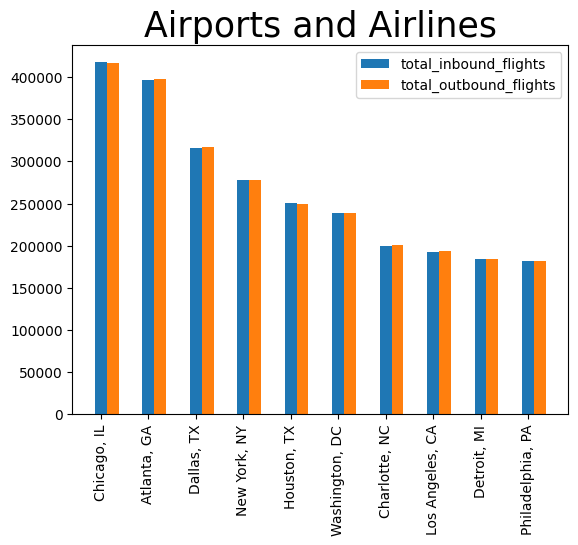

In [21]:
n = 10
total_inbound_flights = list(df_merge["total_inbound_flights"])[0:n]
total_outbound_flights = list(df_merge["total_outbound_flights"])[0:n]
city = list(df_merge["city"])[0:n]
x = np.arange(n)
width = 0.25

plt.title("Airports and Airlines",size = 25)
plt.bar(x,total_inbound_flights,width,label = "total_inbound_flights")
plt.bar(x + width,total_outbound_flights,width,label = "total_outbound_flights")

plt.xticks(x,city, rotation = 90)
plt.legend(loc = "best")
plt.show()